# Logistic Regression


## Plotting Sigmoid Function

[ 7.14248671  1.12930053]


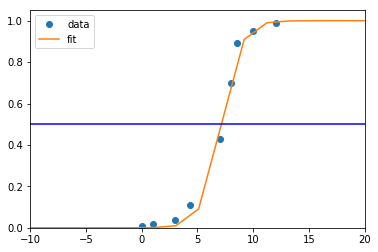

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print popt

x = np.linspace(-50, 50, 50)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.plot(range(-12, 25), [0.5]*37, "b-")
plt.xlim(-10, 20)
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

## Logistic Regression with sklearn

In [11]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X_clf = array[:,0:8]
Y_clf = array[:,8]
seed = 7

/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train_clf, X_test_clf, Y_train_clf, Y_test_clf = model_selection.train_test_split(X_clf, Y_clf, test_size=0.33, random_state=seed)

In [13]:
logistic = LogisticRegression(random_state=7)
logistic.fit(X_train_clf, Y_train_clf)
y_predict_clf = logistic.predict(X_test_clf)

In [14]:
accuracy_score(Y_test_clf, y_predict_clf)

0.75590551181102361

# Evaluation Metrics

## Classification Accuracy

In [15]:
# from sklearn.metrics import accuracy_score

# y_pred = [0, 2, 1, 3]
# y_true = [0, 1, 2, 3]
# accuracy = accuracy_score(y_true, y_pred)

In [16]:
# print(accuracy)

In [17]:
model = LogisticRegression()
model.fit(X_train_clf, Y_train_clf)
expected = Y_train_clf
predicted = model.predict(X_train_clf)
print(accuracy_score(expected, predicted))

0.782101167315


## With Cross-validation

Quite often, we use cross-validation techniques, and use the evaluation metrics to evaluate each round's performance. 

In [18]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'

results = model_selection.cross_val_score(model, X_clf, Y_clf, cv=kfold, scoring=scoring)
print("Accuracy: {:.3f} ({:.3f})".format(results.mean(), results.std()))

Accuracy: 0.770 (0.048)


## Logarithmic Loss

An example of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.

* logloss nearer to 0 is better, with 0 representing a perfect logloss. 

In [19]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_clf, Y_clf, cv=kfold, scoring=scoring)
print("Logloss: {:.3f}, +/-{:.3f}".format(results.mean(), results.std()))

Logloss: -0.493, +/-0.047


## Confusion Matrix


In [20]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train_clf, Y_train_clf)

predicted = model.predict(X_test_clf)
matrix = confusion_matrix(Y_test_clf, predicted)
matrix

array([[141,  21],
       [ 41,  51]])

## F-1 score


In [21]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()

scoring = 'f1'

results = model_selection.cross_val_score(model, X_clf, Y_clf, cv=kfold, scoring=scoring)
print("f1 score: {:.3f} +/-{:.3f}".format(results.mean(), results.std()))

f1 score: 0.618 +/-0.054


## Area Under ROC Curve

In [22]:

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()

scoring = 'roc_auc'

results = model_selection.cross_val_score(model, X_clf, Y_clf, cv=kfold, scoring=scoring)
print("AUC: {:.3f} ({:.3f})".format(results.mean(), results.std()))

AUC: 0.824 (0.041)


## Classification Report

* Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

In [23]:
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_clf, Y_train_clf)
predicted = model.predict(X_test_clf)

report = classification_report(Y_test_clf, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



# Regression Metrics

## Mean Absolute Error

In [24]:
from sklearn.linear_model import LinearRegression

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)

array = dataframe.values
X_reg = array[:,0:13]
Y_reg = array[:,13]
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()

scoring = 'neg_mean_absolute_error'

results = model_selection.cross_val_score(model, X_reg, Y_reg, cv=kfold, scoring=scoring)
print("MAE: {:.3f} ({:.3f})".format(results.mean(), results.std()))

MAE: -4.005 (2.084)


## Mean Squared Error


In [25]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()

scoring = 'neg_mean_squared_error'

results = model_selection.cross_val_score(model, X_reg, Y_reg, cv=kfold, scoring=scoring)
print("MSE: {:.3f} ({:.3f})".format(results.mean(), results.std()))

MSE: -34.705 (45.574)


## $R^2$ Metric

In [26]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()

scoring = 'r2'

results = model_selection.cross_val_score(model, X_reg, Y_reg, cv=kfold, scoring=scoring)
print("R sq: {:.3f} ({:.3f})".format(results.mean(), results.std()))

R sq: 0.203 (0.595)


# Hyperparameter Tuning

## Grid Search

The following code evaluates different alpha values for the Ridge Regression algorithm on the diabetes dataset.

In [27]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_reg, Y_reg)

print(grid.best_params_)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

{'alpha': 1.0}
-0.665626531816
1.0


/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Random Search

The following code evaluates different alpha random values between 0 and 1 for the Ridge Regression algorithm on the diabetes dataset. 

In [28]:
from scipy.stats import uniform as sp_rand
from sklearn.grid_search import RandomizedSearchCV

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_reg, Y_reg)
print(rsearch.best_estimator_)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

Ridge(alpha=0.99233806322310969, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)
-0.668170992108
0.992338063223


## Grid Search vs Random Search

In [29]:
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

In [30]:
# get some data
digits = load_digits()
X, y = digits.data, digits.target

In [31]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)

In [32]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [33]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [34]:
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)

In [35]:
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 27.46 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.932 (std: 0.009)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 5, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.928 (std: 0.006)
Parameters: {'bootstrap': False, 'min_samples_leaf': 4, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 7, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.927 (std: 0.011)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 9, 'max_depth': None}



In [36]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [37]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'min_samples_leaf': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 10], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [38]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 56.72 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.934 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 10, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.934 (std: 0.009)
Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 10, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.933 (std: 0.013)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 10, 'max_depth': None}



## Summary

* The randomized search and the grid search explore exactly the same space of parameters.
* The result in parameter settings is quite similar, while the run time for randomized search can be drastically lower.
* The performance is slightly worse for the randomized search, though this is most likely a noise effect and would not carry over to a held-out test set.
* Note that in practice, one would not search over this many different parameters simultaneously using grid search, but pick only the ones deemed most important.

# Parameter Estimation with grid search and cross-validation

* development set comprises only half of the available labeled data
* the performance of the selected hyper-parameters and trained model is then measured on a dedicated evaluation set that was not used during the model selection step

In [55]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from __future__ import print_function

In [56]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [58]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [59]:
scores = ['precision', 'recall']

In [61]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}

Grid scores on development set:

0.975 (+/-0.031) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.939 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.977 (+/-0.027) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.976 (+/-0.027) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.977 (+/-0.027) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.979 (+/-0.022) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.977 (+/-0.027) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.979 (+/-0.022) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.976 (+/-0.020) for {'kernel': 'linear', 'C': 1}
0.976 (+/-0.020) for {'kernel': 'linear', 'C': 10}
0.976 (+/-0.020) for {'kernel': 'linear', 'C': 100}
0.976 (+/-0.020) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed